# Hour Resolution Part of Project

# Analyzing Data from 2017-2018

In [1]:
from myPyPackages import myData, myDates, myStats, mySignal, myPlots # custom modules.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import pandas as pd

from scipy import stats as sp_stats
from scipy.signal import welch
import scipy.interpolate as interp

import glob
from PIL import Image
import seaborn as sb

In [2]:
# Filepath to save plots

FOLDER = '../Figures/Hour/'

heatmap_folder = FOLDER + "HeatMaps/"
gifheatmap_folder = heatmap_folder + "heatmaps_for_gif/"
eof_folder = FOLDER  + "EOF/"

corr_folder = FOLDER + "Correlations/"

bowser_folder = FOLDER + 'Bowser/'
cortes_folder = FOLDER + 'Cortes/'
craigflower_folder = FOLDER + 'Craigflower/'
cumberland_folder = FOLDER + 'Cumberland/'
happyvalley_folder = FOLDER + 'HappyValley/'
jamesbay_folder = FOLDER + 'JamesBay/'
macaulay_folder = FOLDER + 'Macaulay/'
monterey_folder = FOLDER + 'Monterey/'
phoenix_folder = FOLDER + 'Phoenix/'
rvyc_folder = FOLDER + 'RVYC/'
rogers_folder = FOLDER + 'Rogers/'
shawnigan_folder = FOLDER + 'ShawniganLake/'
strawberry_folder = FOLDER + 'Strawberry/'
uvic_folder = FOLDER + 'UVic/'
viu_folder = FOLDER + 'VIU/'

station_folders = [heatmap_folder, corr_folder, bowser_folder, cortes_folder, craigflower_folder,
                    cumberland_folder, happyvalley_folder, jamesbay_folder, macaulay_folder, 
                    monterey_folder, phoenix_folder, rvyc_folder, rogers_folder, shawnigan_folder, 
                    uvic_folder, viu_folder]


In [3]:
# Station Names
station_names = ['Bowser', 'Cortes', 'Craigflower', 'Cumberland', 'HappyValley',
                 'JamesBay', 'Macaulay', 'Monterey', 'Phoenix', 'RVYC', 'Rogers', 
                 'ShawniganLake', 'Strawberry', 'UVicSci', 'VIU']

label_names = ['Bowser', 'Cortes', 'Craigflower', 'Cumberland', 'Happy Valley',
                'JamesBay', 'Macaulay', 'Monterey', 'Phoenix', 'RVYC', 'Rogers', 
                'Shawnigan Lake', 'Strawberry', 'UVic', 'VIU']

abbr_names = ['Bow', 'Cor', 'Craig', 'Cumb', 'HV',
                'JB', 'Mac', 'Mon', 'Ph', 'RVYC', 'Ro', 
                'SL', 'Straw', 'UVic', 'VIU']

# Other parameters
sample_f = 1/(3600) # sample rate, 1 sample / 1h => 1sample / 3600secs


# Reading in Station info
station_info = myData.getStationInfo()
locations = station_info.drop(['station', 'elev'], axis=1)


dtype = 'hr'
summer_start = myDates.DateStrtoNum('01/06/2017', dtype = dtype)
summer_end = myDates.DateStrtoNum('30/09/2017, 23:59', dtype=dtype)
winter_start = myDates.DateStrtoNum('01/11/2017', dtype = dtype)
winter_end = myDates.DateStrtoNum('28/02/2018, 23:59', dtype=dtype)


# Reading in Minute data for all stations
data = [myData.readHourData(i) for i in range(len(station_names))]
for d in data:
    d.times -= (7/24)

data_summer = [myDates.getRange(d, summer_start, summer_end) for d in data]
data_winter = [myDates.getRange(d, winter_start, winter_end) for d in data]

In [4]:
summer_times = data_summer[0].times
winter_times = data_winter[0].times

summer_temps = [(data_summer[i].temperature) for i in range(len(data_summer))]
names = np.arange(1, 16)
summer = pd.concat(summer_temps, axis=1)
summer.columns = names
summer.insert(0, 'times', summer_times)



winter_temps = [ (data_winter[i].temperature) for i in range(len(data_winter))]
names = np.arange(1, 16)
winter = pd.concat(winter_temps, axis=1)
winter.columns = names
winter.insert(0, 'times', winter_times)

## Checking for Nan Values

In [5]:
def checkNans(data):
    
    tmp = summer.drop('times', axis=1).isna().any()
    
    print("Nans in Temps? ->  {}.".format(True in tmp))
    if True in tmp:
        print(f"index of station where nan is: {np.where(tmp == True)[0] + 1}")
        print()


In [6]:
# Checking for Nan values

print("***For Summer***")
checkNans(summer)
print()

print("***For Winter***")
checkNans(winter)

***For Summer***
Nans in Temps? ->  True.
index of station where nan is: [10]


***For Winter***
Nans in Temps? ->  True.
index of station where nan is: [10]



## Filling in Nan Values by interpolation

In [7]:
ind = 10
summer[ind] = summer[ind].interpolate(method='cubic')
winter[ind] = winter[ind].interpolate(method='cubic')

In [8]:
# Checking for Nan values

print("***For Summer***")
checkNans(summer)
print()

print("***For Winter***")
checkNans(winter)

***For Summer***
Nans in Temps? ->  True.
index of station where nan is: []


***For Winter***
Nans in Temps? ->  True.
index of station where nan is: []



## Temperature Heat Map

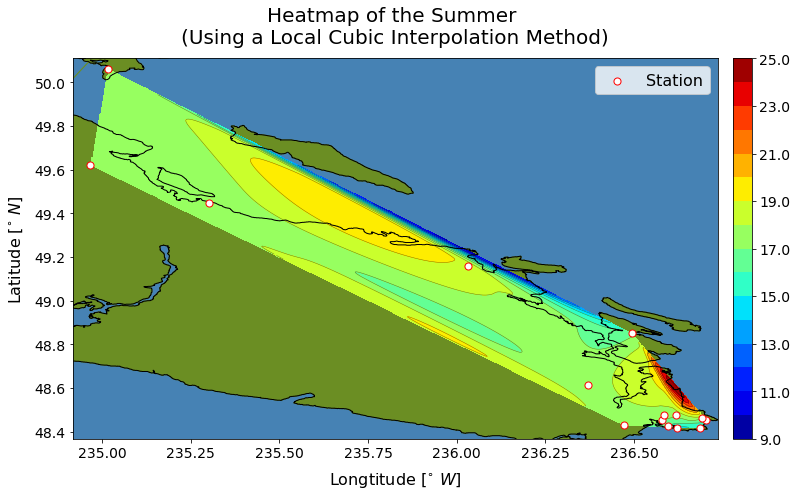

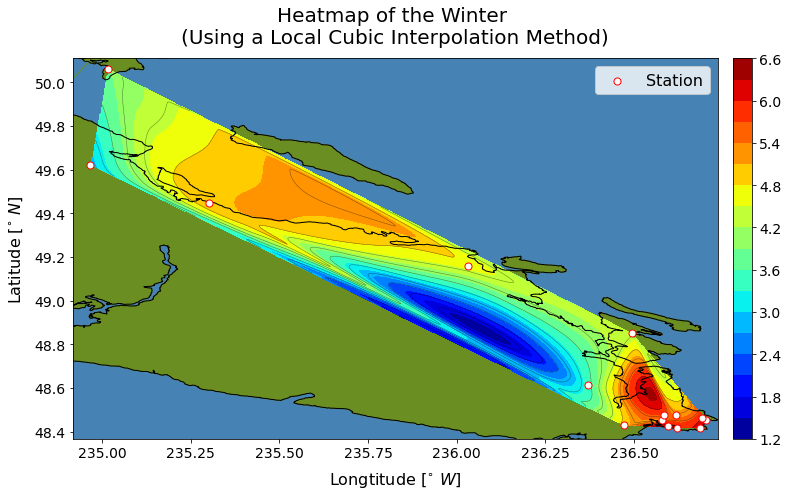

In [9]:
grid = (1000, 1000)
title = 'Heatmap of the {} \n(Using a Local Cubic Interpolation Method)'

plt.figure(figsize=(12, 7), tight_layout=True)
stuff = mySignal.localInterp(summer.drop("times", axis=1).mean(), locations, grid=grid, method='cubic')
myPlots.plotLocalHeatMap(stuff,
                        title = title.format('Summer'),
                        style='contourf',
                        axisLimits=True,
                        fontsize=16)

# # plt.savefig(heatmap_folder + 'heatmapTemp_summer.jpeg')
# plt.close()

plt.figure(figsize=(12, 7), tight_layout=True)
stuff = mySignal.localInterp(winter.drop('times', axis=1).mean(), locations, grid=grid, method='cubic')
myPlots.plotLocalHeatMap(stuff,
                        title = title.format('Winter'),
                        style='contourf',
                        axisLimits=True,
                        fontsize=16)
# plt.savefig(heatmap_folder + 'heatmapTemp_winter.jpeg')
# plt.close()

## Making Heatmap Gif of Summer and Winter Temperture

### For Summer

In [10]:
dtype = 'hr'
s1 = myDates.DateStrtoNum('01/06/2017', dtype = dtype)
s2 = myDates.DateStrtoNum('30/09/2017, 23:59', dtype=dtype)
s3 = myDates.DateStrtoNum('01/07/2017', dtype = dtype)
s4 = myDates.DateStrtoNum('31/07/2017, 23:59', dtype=dtype)
s5 = myDates.DateStrtoNum('01/08/2017', dtype = dtype)
s6 = myDates.DateStrtoNum('31/08/2017, 23:59', dtype=dtype)
s7 = myDates.DateStrtoNum('01/09/2017', dtype = dtype)
s8 = myDates.DateStrtoNum('30/09/2017, 23:59', dtype=dtype)

sum_dates = np.array([(s1, s2), (s3, s4), (s5, s6), (s7, s8)])
summer_months = ["June", "July", "August", "September"]

In [11]:
tmp_data = data_summer
tmp_dates = sum_dates

N = len(tmp_data)
M = len(tmp_dates)
avg_temps = []
for m in range(M):
    avgs = []
    for i in range(N):
        tmp = myDates.getRange(tmp_data[i], tmp_dates[m][0], tmp_dates[m][1])
        avgs.append(tmp.temperature.mean())
    avg_temps.append(avgs)

avg_temps = np.array(avg_temps)

In [12]:
frames = []
tmp_data = avg_temps
N = len(tmp_data)

for i in range(N):
    stuff = mySignal.localInterp(tmp_data[i], locations, grid=grid, method='cubic')
    plt.figure(figsize=(16, 9), tight_layout=True)
    myPlots.plotLocalHeatMap(stuff = stuff,
                             title= f"Heatmap for {summer_months[i]}\nTemperature [$^\circ C$]",
                             style='contourf',
                             axisLimits=True,
                             fontsize=16)
    tmp = gifheatmap_folder + f'Summer/{summer_months[i]}.jpeg'
    # plt.savefig(tmp)
    plt.close()
    # frames.append(Image.open(tmp))

    

# frame_one = frames[0]
# frame_one.save(heatmap_folder + 'SummerHeatmap_gif.gif', format="GIF", append_images=frames,
#                save_all=True, duration=1000, loop=0)

### For Winter

In [13]:
dtype = 'hr'
s1 = myDates.DateStrtoNum('01/11/2017', dtype = dtype)
s2 = myDates.DateStrtoNum('30/11/2017, 23:59', dtype=dtype)
s3 = myDates.DateStrtoNum('01/12/2017', dtype = dtype)
s4 = myDates.DateStrtoNum('31/12/2017, 23:59', dtype=dtype)
s5 = myDates.DateStrtoNum('01/01/2018', dtype = dtype)
s6 = myDates.DateStrtoNum('31/01/2018, 23:59', dtype=dtype)
s7 = myDates.DateStrtoNum('01/02/2018', dtype = dtype)
s8 = myDates.DateStrtoNum('28/02/2018, 23:59', dtype=dtype)

win_dates = np.array([(s1, s2), (s3, s4), (s5, s6), (s7, s8)])
win_months = ["November", "December", "January", "February"]

In [14]:
tmp_data = data_winter
tmp_dates = win_dates

N = len(tmp_data)
M = len(tmp_dates)
avg_temps = []
for m in range(M):
    avgs = []
    for i in range(N):
        tmp = myDates.getRange(tmp_data[i], tmp_dates[m][0], tmp_dates[m][1])
        avgs.append(tmp.temperature.mean())
    avg_temps.append(avgs)

avg_temps = np.array(avg_temps)

In [15]:
frames = []
tmp_data = avg_temps
N = len(tmp_data)

for i in range(N):
    stuff = mySignal.localInterp(tmp_data[i], locations, grid=grid, method='cubic')
    plt.figure(figsize=(16, 9), tight_layout=True)
    myPlots.plotLocalHeatMap(stuff = stuff,
                             title= f"Heatmap for {win_months[i]}\nTemperature [$^\circ C$]",
                             style='contourf',
                             axisLimits=True,
                             fontsize=16)
    tmp = gifheatmap_folder + f'Winter/{win_months[i]}.jpeg'
    # plt.savefig(tmp)
    plt.close()
#     frames.append(Image.open(tmp))

    

# frame_one = frames[0]
# frame_one.save(heatmap_folder + 'WinterHeatmap_gif.gif', format="GIF", append_images=frames,
#                save_all=True, duration=1000, loop=0)


## Empirical Orthogonal Functions (EOFs)

In [16]:
from eofs.standard import Eof
from scipy import interpolate

In [17]:
def getEOFs(data, grid):
    coastline = myData.readCoastLine() # getting coastal line.
    min_long, min_lat = coastline.min()
    max_long, max_lat = coastline.max()

    # Creating grids for gridding data.
    xi = np.linspace(min_long, max_long, int(grid[0]))
    yi = np.linspace(min_lat, max_lat, int(grid[1]))
    xi, yi = np.meshgrid(xi, yi)

    lon, lat = locations.long, locations.lati

    zi_all = []
    for dat in data.drop('times', axis=1).to_numpy():
        zi_all.append(interpolate.griddata((lon, lat), dat, (xi, yi), method='cubic'))
    

    solver = Eof(np.array(zi_all, dtype='float')) #Assumes for each value of a griddata, is a new time point


    return solver, xi, yi

In [18]:
def plotEOF(tmp, grid=(1000, 1000), title=''):

    solver, xi , yi = getEOFs(data=tmp, grid=grid)

    eof1 = solver.eofsAsCorrelation(neofs=3) #Returns first correlation function
    pc1 = solver.pcs(npcs=3, pcscaling=1)
    variance_fractions = solver.varianceFraction()


    coastline = myData.readCoastLine()

    fs = 16 # fontsize
    fig, axes = plt.subplots(2, 3, figsize=(20, 10), dpi=600)
    axes = np.hstack(axes)

    fig.suptitle(title, fontsize = fs+2, y=0.99)

    title = ['EOF 1', 'EOF 2', 'EOF 3']

    axesTop = axes[:3]
    N = len(axesTop)
    for i in range(N):
        axs = axesTop[i]
        axs.set_facecolor('steelblue') # coloring ocean.
        axs.plot(coastline.long, coastline.lati, color="k", linewidth=1) # plotting land
        axs.fill(coastline.long, coastline.lati, zorder=0, color="olivedrab") # coloring land

        cmap = plt.get_cmap('jet')
        fill = axs.contourf(xi, yi, eof1[i].squeeze(), 15,  cmap=cmap)
        cbar = fig.colorbar(fill, ax=axs)
        cbar.ax.tick_params(labelsize=fs-4) 
        cbar.set_label(r'Correlation')

        axs.scatter(locations.long,
                    locations.lati, 
                    color='white',
                    edgecolor='r', 
                    label='Station',
                    s=30,
                    zorder=10)  

        axs.set_xlim(234.85, 236.75)
        axs.set_ylim(None, 50.15)
        axs.tick_params(axis='x', rotation=45)
        axs.set_title(title[i], fontsize=fs)

        

    # EOF parameters
    ylabel = "Amplitude"
    title = ["$1^{st}$ Principle Component\n of Time Series",
            "$2^{nd}$ Principle Component\n of Time Series",
            "$3^{rd}$ Principle Component\n of Time Series"]
    ticks = np.linspace(min(tmp.times), max(tmp.times), 4)
    tickLabels = [myDates.DateNumtoStr(i, dtype='hr') for i in ticks]

    # EOF principles
    axesBottom = axes[3:]
    N = len(axesBottom)
    for i in range(N):
        axs = axesBottom[i]
        axs.plot(tmp.times, pc1[:, i])
        axs.set_xticks(ticks)
        axs.set_xticklabels(tickLabels, fontsize=fs-4)
        axs.set_ylabel(ylabel, fontsize=fs-4)
        axs.set_title(title[i], fontsize=fs)
        axs.grid()
    
    fig.tight_layout(w_pad=5, h_pad=2)

    return pd.DataFrame({'Principle Component': [i+1 for i in range(len(variance_fractions))],'Var': variance_fractions})

In [19]:
s1 = myDates.DateStrtoNum("1/06/2017", dtype='hr')
e1 = myDates.DateStrtoNum("30/06/2017, 23:59", dtype='hr')
june = myDates.getRange(summer, s1, e1)

grid = (100, 100)

plotEOF(summer, grid=grid, title='For Summer 2017')
# plt.savefig(eof_folder + 'summer.jpeg')
plt.show()

In [21]:
s2 = myDates.DateStrtoNum("1/12/2017", dtype='hr')
e2 = myDates.DateStrtoNum("31/12/2017, 23:59", dtype='hr')
december = myDates.getRange(winter, s2, e2)

plotEOF(winter, grid=grid, title='For Winter 2017')
# plt.savefig(eof_folder + 'winter.jpeg')
plt.show()

ValueError: all input data is missing

In [ ]:
s1 = myDates.DateStrtoNum("1/06/2017", dtype='hr')
e1 = myDates.DateStrtoNum("30/06/2017, 23:59", dtype='hr')
june = myDates.getRange(summer, s1, e1)

grid = (100, 100)

plotEOF(june, grid=grid, title='For June 2017')
# plt.savefig(eof_folder + 'summer.jpeg')

In [ ]:
s2 = myDates.DateStrtoNum("1/12/2017", dtype='hr')
e2 = myDates.DateStrtoNum("31/12/2017, 23:59", dtype='hr')
december = myDates.getRange(winter, s2, e2)

plotEOF(december, grid=grid, title='For December 2017')
# plt.savefig(eof_folder + 'winter.jpeg')